In [293]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [294]:
# Downloaded NC_Master_Address_Dataset_-_2014_CAB.csv from
# https://www.nconemap.gov/datasets/nc-master-address-dataset-2014/geoservice. 
# 
#data = pd.read_csv("NC_Master_Address_Dataset_-_2014_CAB.csv", skipinitialspace=True, usecols = ['ADDR_SN','COUNTY_NAME', 'FULL_ADDRESS', 'ZIPCODE', 'DDLat', 'DDLon'], low_memory = False)
#data = data[data['ZIPCODE']==28027]
data1 = pd.read_csv("NC_Master_Address_Dataset_-_2014_CAB.csv")
print("shape of data1 is:", data1.shape)
data1.head()

shape of data1 is: (90543, 28)


,X,Y,OBJECTID,ENTRY_ID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,FULL_ADDRESS,SUB_HN,APT_UNIT,RES_TYPE,COMMUNITY,ZIPCODE,PO_NAME,STATE,COUNTY_NAME,FIPS,STATE_ID,COORSYS,POINT_X,POINT_Y,USNG,DDLat,DDLon,PROCESS_ID
0,1.514961e+06,616911.476343,453431,CABARRUSADDRESSPOINTS2,1602,NaN,NaN,CARALEA VALLEY,DRIVE,NORTHWEST,1602 CARALEA VALLEY DRIVE NORTHWEST,NaN,,NaN,NaN,28027,NaN,NC,CABARRUS,25,37,2264,1.514961e+06,616911.476343,17S NV 33728 21254,35.43415N,080.62841W,A
1,1.528647e+06,605532.000415,453432,CABARRUSADDRESSPOINTS4,142,NaN,NaN,CHESTNUT,DRIVE,SOUTHWEST,142 CHESTNUT DRIVE SOUTHWEST,NaN,,NaN,NaN,28025,NaN,NC,CABARRUS,25,37,2264,1.528647e+06,605532.000415,17S NV 37968 17871,35.40350N,080.58186W,A
2,1.533665e+06,600705.697403,453433,CABARRUSADDRESSPOINTS5,726,NaN,NaN,SPRING,ST,SOUTHWEST,726 SPRING STREET SOUTHWEST,NaN,,NaN,NaN,28025,NaN,NC,CABARRUS,25,37,2264,1.533665e+06,600705.697403,17S NV 39526 16431,35.39046N,080.56477W,A
3,1.538479e+06,607313.361025,453434,CABARRUSADDRESSPOINTS6,540,NaN,NaN,TRIPOLIS,ST,SOUTHEAST,540 TRIPOLIS STREET SOUTHEAST,NaN,,NaN,NaN,28025,NaN,NC,CABARRUS,25,37,2264,1.538479e+06,607313.361025,17S NV 40952 18474,35.40882N,080.54896W,A
4,1.486521e+06,608832.312383,453435,CABARRUSADDRESSPOINTS7,295,NaN,NaN,BLACKBERRY,TRAIL,NaN,295 BLACKBERRY TRAIL,NaN,,NaN,NaN,28027,NaN,NC,CABARRUS,25,37,2264,1.486521e+06,608832.312384,17S NV 25113 18618,35.41064N,080.72340W,A


In [295]:
# Explore dataframe data1, checking unique vaule counts of column RES_TYPE.
item_counts = data1['RES_TYPE'].value_counts(normalize=False)
print(item_counts)

Series([], Name: RES_TYPE, dtype: int64)


In [296]:
# Explore dataframe data1, checking unique vaules of column PO_NAME.
data1.PO_NAME.unique()

array([nan])

In [297]:
# Explore dataframe data1, checking unique vaules of column ZIPCODE.
data1.ZIPCODE.unique()


array([28027, 28025, 28083, 28081, 28124, 28107, 28075, 28078, 28269,
       28071, 28036, 28097, 28215, 28138, 28262, 28213, 28227],
      dtype=int64)

In [298]:
# Get all the unique values of ZIPCODE.
# Change ZIPCODE unique values into a dataframe zip.
postalcode = data1.ZIPCODE.unique()
zipcode = pd.DataFrame(postalcode)
zipcode.columns = ['ZIPCODE']
print("Unique zip codes in Cabarrus County, North Carolina are: ", zipcode.shape)
print(type(zipcode))
print(zipcode.dtypes)
zipcode

Unique zip codes in Cabarrus County, North Carolina are:  (17, 1)
<class 'pandas.core.frame.DataFrame'>
ZIPCODE    int64
dtype: object


,ZIPCODE
0,28027
1,28025
2,28083
3,28081
4,28124
5,28107
6,28075
7,28078
8,28269
9,28071


In [299]:
# change ZIPCODE column to object
zipcode.astype({'ZIPCODE': 'object'}).dtypes

ZIPCODE    object
dtype: object

In [300]:
# Get latitude and longitude data for each zipcode in the dataframe.
# Install library pgeocode
! pip install pgeocode
import pgeocode
nomi = pgeocode.Nominatim('us')
nomi.query_postal_code("28027")


postal_code                28027
country_code                  US
place_name               Concord
state_name        North Carolina
state_code                    NC
county_name             Cabarrus
county_code                   25
community_name               NaN
community_code               NaN
latitude                 35.4141
longitude               -80.6162
accuracy                       4
Name: 0, dtype: object

In [301]:
# Loop through the ZIPCODE column of dataframe zipcode to create 3 data series, namely lat, long, and city to 
# contain the latitudes, longitudes, and place_name (i.e., city).
lat = []
long = []
city = []
for code in zipcode['ZIPCODE']:
    geo = nomi.query_postal_code(code)
    latitude = geo.latitude
    longitude = geo.longitude
    place_name = geo.place_name
    lat.append(latitude)
    long.append(longitude)
    city.append(place_name)
print(lat)
print(long)
print(city)

[35.4141, 35.3716, 35.4848, 35.50199999999999, 35.4146, 35.2477, 35.3247, 35.4011, 35.2886, 35.5498, 35.4858, 35.2704, 35.244, 35.5494, 35.3183, 35.2836, 35.1936]
[-80.6162, -80.53, -80.6015, -80.6359, -80.4171, -80.5319, -80.6594, -80.8695, -80.8209, -80.3346, -80.794, -80.4211, -80.7387, -80.4226, -80.7476, -80.7638, -80.6846]
['Concord', 'Concord', 'Kannapolis', 'Kannapolis', 'Mount Pleasant', 'Midland', 'Harrisburg', 'Huntersville', 'Charlotte', 'Gold Hill', 'Davidson', 'Locust', 'Charlotte', 'Rockwell', 'Charlotte', 'Charlotte', 'Charlotte']


In [302]:
# Populate 3 new columns: Latitude, Longitude, and City for the dataframe zipcode
zipcode['Latitude'] = lat
zipcode['Longitude'] = long
zipcode['City'] = city
print(zipcode.dtypes)
cabarrus  = zipcode.copy()
cabarrus

ZIPCODE        int64
Latitude     float64
Longitude    float64
City          object
dtype: object


,ZIPCODE,Latitude,Longitude,City
0,28027,35.4141,-80.6162,Concord
1,28025,35.3716,-80.5300,Concord
2,28083,35.4848,-80.6015,Kannapolis
3,28081,35.5020,-80.6359,Kannapolis
4,28124,35.4146,-80.4171,Mount Pleasant
5,28107,35.2477,-80.5319,Midland
6,28075,35.3247,-80.6594,Harrisburg
7,28078,35.4011,-80.8695,Huntersville
8,28269,35.2886,-80.8209,Charlotte
9,28071,35.5498,-80.3346,Gold Hill


In [303]:
cabarrus = cabarrus.astype({"ZIPCODE": object})
print(cabarrus.dtypes)
print(type(cabarrus))

ZIPCODE       object
Latitude     float64
Longitude    float64
City          object
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [304]:
# Use geopy library to get the latitude and longitude values of Cabarrus County, North Carolina.
address = 'Cabarrus County, North Carolina'

geolocator = Nominatim(user_agent="cabarrus_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Cabarrus County North Carolina are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Cabarrus County North Carolina are 35.4045503, -80.564371.


In [310]:
# Create a map of Cabarrus County North Carolina using latitude and longitude values.
# Superimpose different zip code areas on the county map.
map_cabarrus = folium.Map(location=[latitude,longitude], zoom_start=10)

# Add markers of ZIPCODE and city name to map.
for row in cabarrus.itertuples():
    label = '{},{}'.format(row.ZIPCODE, row.City)
    label = folium.Popup(label, parse_html=True)
    lat = row.Latitude
    lng = row.Longitude
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cabarrus)  
    
map_cabarrus

# Next, we are going to start utilizing the Foursquare API to explore the zip code areas and segment them.

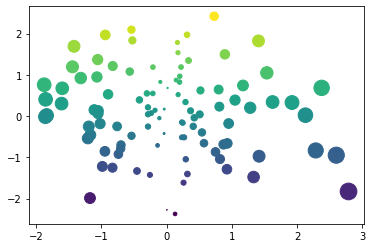

In [311]:
{
    "tags": [
        "hide-input",
    ]
}
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));